# Exploring the FAO Kenya Datasets

Purpose: Analyze the null/empty value percentages for each dataset

This will help us understand the data and decide on the best way to handle the null values. Specifically, I wanted to see what data was available to group the foods into meals.


In [1]:
pip install pandas matplotlib seaborn chardet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [3]:
def analyze_csv(file_path):
    # Detect file encoding
    with open(file_path, 'rb') as file:
        raw_data = file.read()
        result = chardet.detect(raw_data)
        encoding = result['encoding']

    # Read CSV with detected encoding
    df = pd.read_csv(file_path, encoding=encoding)
    
    # Calculate percentage of null/empty values for each column
    null_percentages = (df.isnull() | df.eq('')).mean() * 100

    #  # Print column types for debugging
    # print("Null/empty value percentages:")
    # for column, percentage in null_percentages.items():
    #     print(f"{column}: {percentage:.2f}%")
    
    # # Print column types for debugging
    # print("\nColumn types:")
    # print(df.dtypes)
    
    # # Print first few rows for visual inspection
    # print("\nFirst few rows:")
    # print(df.head())
    
    return null_percentages

In [4]:
dataset_folder = "Datasets"
results = {}

# Analyze each dataset
for root, dirs, files in os.walk(dataset_folder):
    for file in files:
        if file == "consumption_user.csv":
            file_path = os.path.join(root, file)
            dataset_name = os.path.basename(os.path.dirname(file_path))
            results[dataset_name] = analyze_csv(file_path)

C:\Users\qianc\AppData\Local\Temp\ipykernel_9148\147223515.py:9: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\qianc\AppData\Local\Temp\ipykernel_9148\147223515.py:9: DtypeWarning: Columns (75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\qianc\AppData\Local\Temp\ipykernel_9148\147223515.py:9: DtypeWarning: Columns (75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\qianc\AppData\Local\Temp\ipykernel_9148\147223515.py:9: DtypeWarning: Columns (75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\qianc\AppData\Local\Temp\ipykernel_9148\147223515.py:9: DtypeWarning: Columns (75) have mixed types. Specify dtype option on import

In [5]:
# Print results
for dataset, null_percentages in results.items():
    print(f"\nNull/Empty Value Percentages for {dataset}:")
    for column, percentage in null_percentages.items():
        print(f"{column}: {percentage:.2f}%")
    print("\n" + "="*50)


Null/Empty Value Percentages for KEN_00035:
SUBJECT: 0.00%
ROUND: 0.00%
SURVEY_DAY: 0.00%
RESPONDER: 100.00%
SEASON: 100.00%
CONSUMPTION_DAY: 100.00%
CONSUMPTION_MONTH: 0.00%
CONSUMPTION_YEAR: 0.00%
WEEK_DAY: 100.00%
EXCEPTION_DAY: 100.00%
CONSUMPTION_TIME_HOUR: 100.00%
CONSUMPTION_TIME_MINUTES: 100.00%
MEAL_NAME: 100.00%
PLACE: 100.00%
FOOD_TYPE: 10.47%
RECIPE_CODE: 17.32%
RECIPE_DESCR: 100.00%
RECIPE_DESCR_ENG: 17.32%
FOODEX2_RECIPE_CODE: 17.32%
FOODEX2_RECIPE_DESCR: 17.32%
AMOUNT_RECIPE: 17.32%
CODE_INGREDIENT: 0.00%
INGREDIENT: 100.00%
INGREDIENT_ENG: 0.00%
FOODEX2_INGR_CODE: 0.00%
FOODEX2_INGR_DESCR: 0.00%
FOOD_AMOUNT_UNPROC: 0.00%
FOOD_AMOUNT_CONS: 100.00%
FOOD_AMOUNT_REPORTED: 0.00%
ENERGY_kcal: 0.00%
WATER_g: 59.85%
PROTEIN_g: 0.00%
A_PROT_g: 100.00%
V_PROT_g: 59.85%
CARBOH_g: 0.00%
SUGAR_g: 100.00%
FIBTG_g: 0.00%
ALCOHOL_g: 59.85%
FAT_g: 0.00%
SAT_FAT_g: 0.00%
MUFA_g: 0.00%
PUFA_g: 0.00%
TFA_g: 100.00%
CHOL_mg: 0.00%
CALC_mg: 0.00%
IRON_mg: 0.00%
ZINC_mg: 0.00%
MG_mg: 0.00%
P

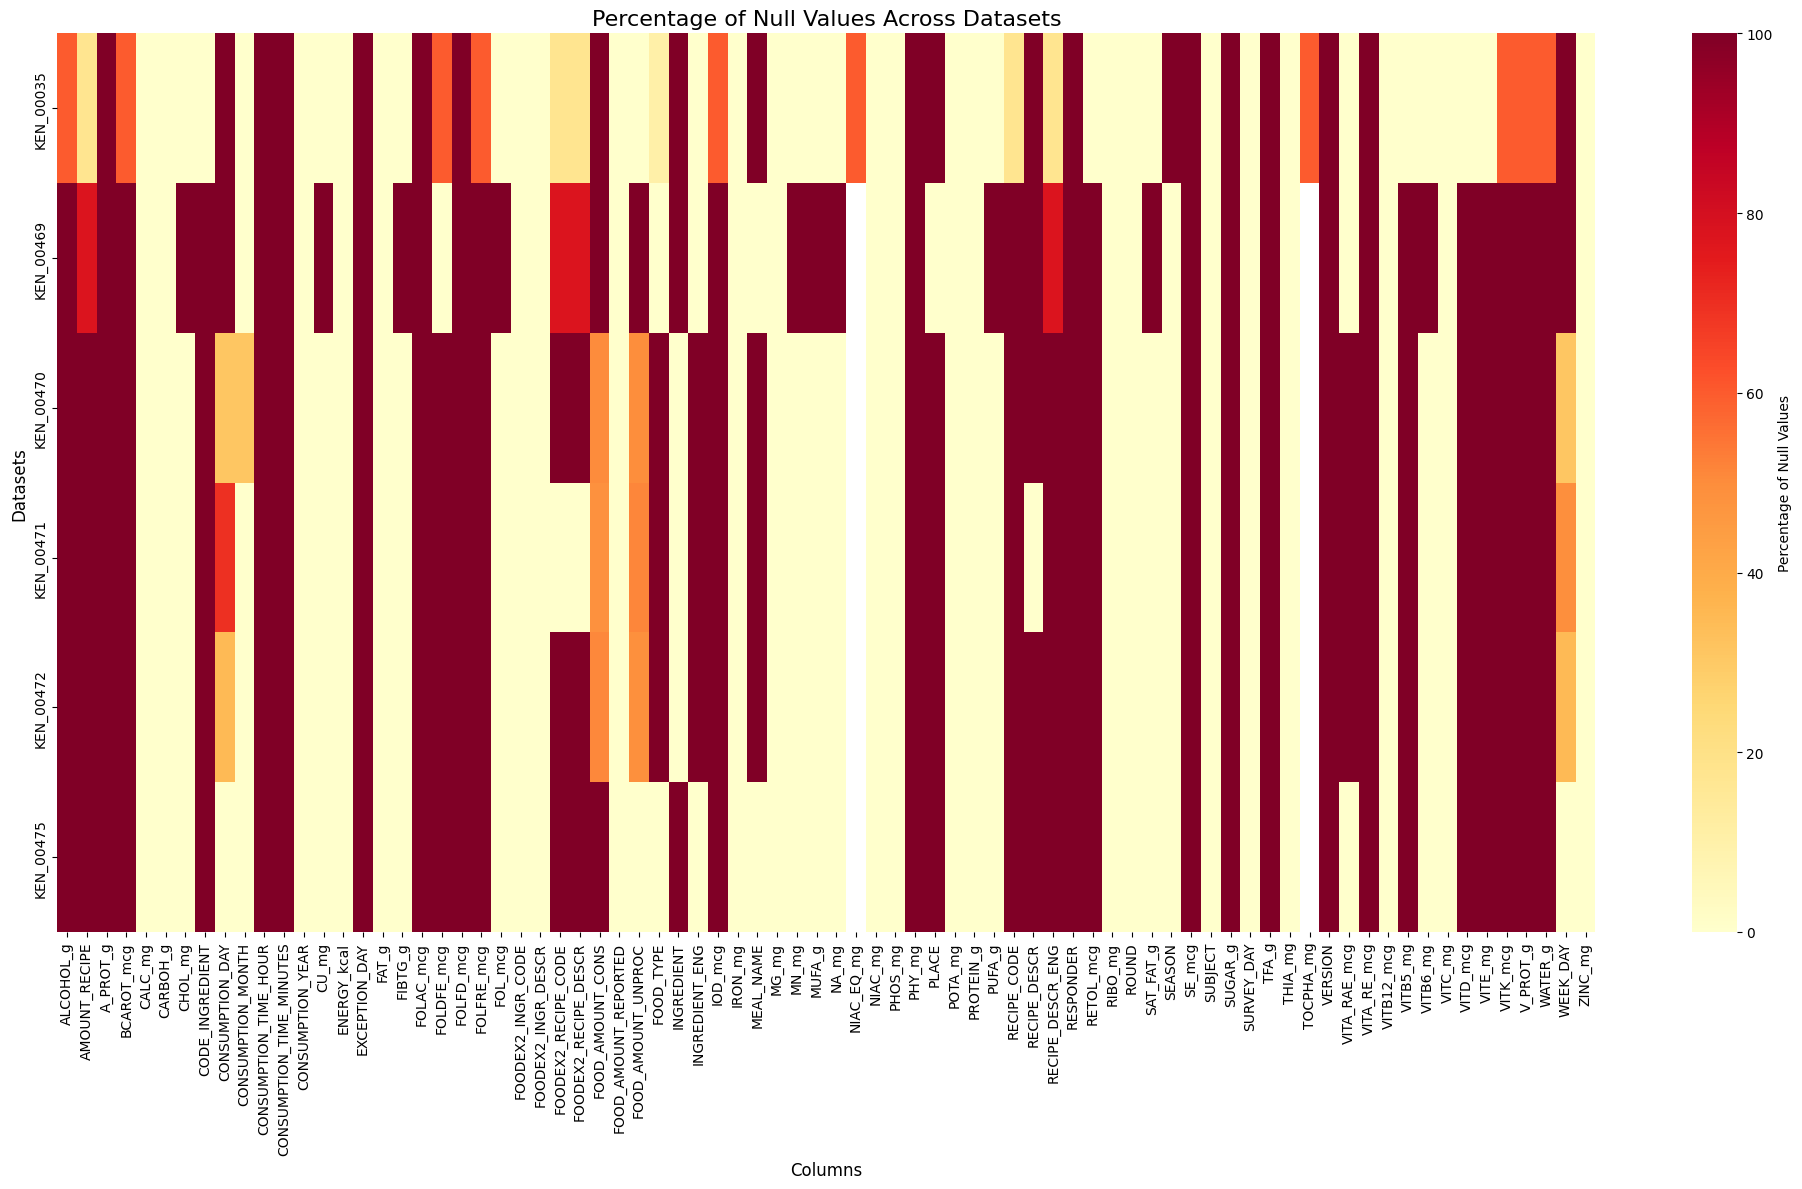

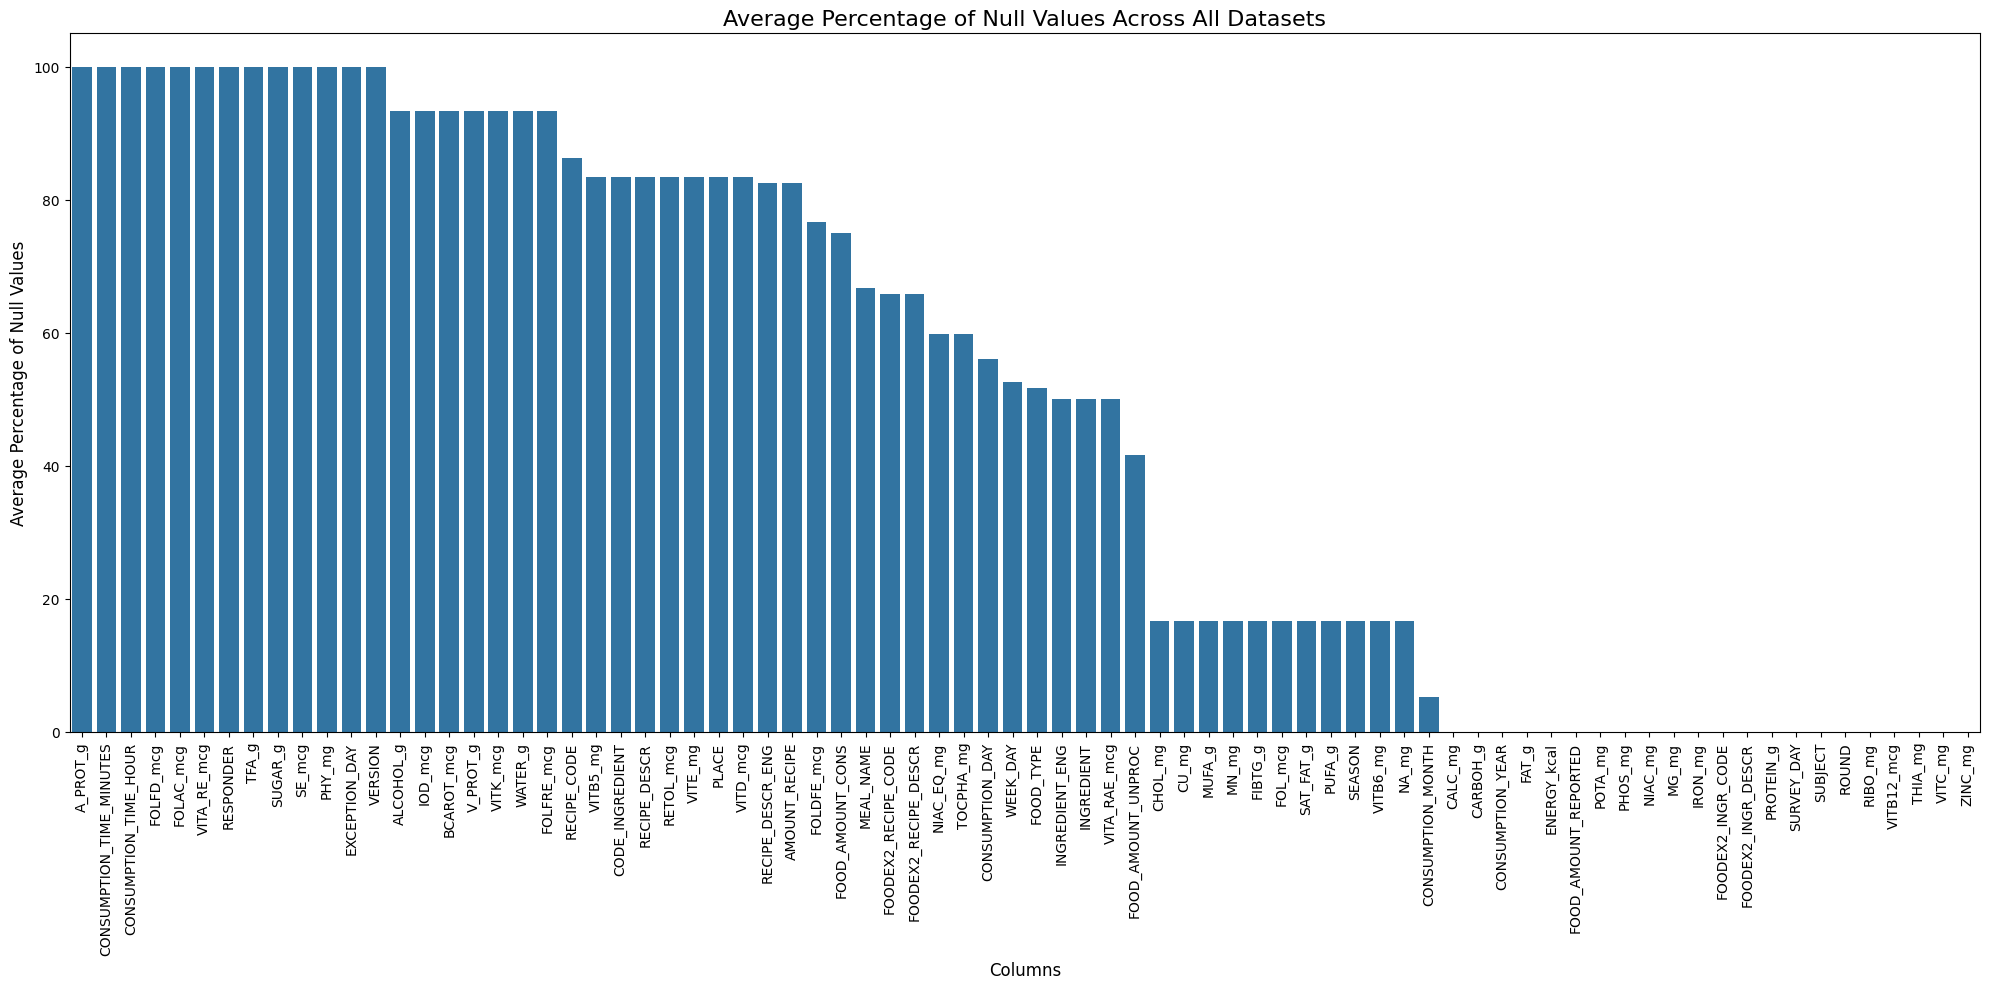

In [18]:
# Convert the results dictionary to a DataFrame
df_nulls = pd.DataFrame(results).T

# Create a figure and axes
plt.figure(figsize=(20, 12))

# Create a heatmap
sns.heatmap(df_nulls, cmap="YlOrRd", annot=False, cbar_kws={'label': 'Percentage of Null Values'})

# Customize the plot
plt.title("Percentage of Null Values Across Datasets", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Datasets", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Create a bar plot for average null percentages across all datasets
avg_nulls = df_nulls.mean().sort_values(ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x=avg_nulls.index, y=avg_nulls.values)
plt.title("Average Percentage of Null Values Across All Datasets", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Average Percentage of Null Values", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [16]:
#Combine all of the datasets into one dataframe and then save it as a csv

dataset_folder = "Datasets"

combined_df = pd.DataFrame()

# Analyze each dataset
for root, dirs, files in os.walk(dataset_folder):
    for file in files:
        if file == "consumption_user.csv":
            file_path = os.path.join(root, file)
            dataset_name = os.path.basename(os.path.dirname(file_path))

            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                encoding = result['encoding']

            # Read CSV with detected encoding
            df = pd.read_csv(file_path, encoding=encoding)
            combined_df = pd.concat([combined_df, df], ignore_index=True)


C:\Users\qianc\AppData\Local\Temp\ipykernel_9148\3858548054.py:20: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\qianc\AppData\Local\Temp\ipykernel_9148\3858548054.py:20: DtypeWarning: Columns (75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\qianc\AppData\Local\Temp\ipykernel_9148\3858548054.py:20: DtypeWarning: Columns (75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\qianc\AppData\Local\Temp\ipykernel_9148\3858548054.py:20: DtypeWarning: Columns (75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\qianc\AppData\Local\Temp\ipykernel_9148\3858548054.py:20: DtypeWarning: Columns (75) have mixed types. Specify dtype option

In [17]:
#clean the dataframe
# print(combined_df.columns)
# print(len(combined_df))
#drop the columns with all null values
combined_df = combined_df.dropna(axis=1, how='all')
# print(combined_df.columns)
# print(len(combined_df))

# Save the combined dataframe to a csv file
combined_df.to_csv('combined_consumption_user.csv', index=False)

#drop the rows with null values in the WEEK_DAY and CONSUMPTION_DAY column
combined_df = combined_df.dropna(subset=['WEEK_DAY', 'CONSUMPTION_DAY'])
# print(combined_df.columns)
# print(len(combined_df))

# Save the combined dataframe to a csv file
combined_df.to_csv('combined_consumption_user_with_days.csv', index=False)

#drop the rows with null values in the 'food_name' column
combined_df = combined_df.dropna(subset=['MEAL_NAME'])
# print(combined_df.columns)
# print(len(combined_df))

# Save the combined dataframe to a csv file
combined_df.to_csv('combined_consumption_user_with_days_and_food_name.csv', index=False)

Index(['SUBJECT', 'ROUND', 'SURVEY_DAY', 'RESPONDER', 'SEASON',
       'CONSUMPTION_DAY', 'CONSUMPTION_MONTH', 'CONSUMPTION_YEAR', 'WEEK_DAY',
       'EXCEPTION_DAY', 'CONSUMPTION_TIME_HOUR', 'CONSUMPTION_TIME_MINUTES',
       'MEAL_NAME', 'PLACE', 'FOOD_TYPE', 'RECIPE_CODE', 'RECIPE_DESCR',
       'RECIPE_DESCR_ENG', 'FOODEX2_RECIPE_CODE', 'FOODEX2_RECIPE_DESCR',
       'AMOUNT_RECIPE', 'CODE_INGREDIENT', 'INGREDIENT', 'INGREDIENT_ENG',
       'FOODEX2_INGR_CODE', 'FOODEX2_INGR_DESCR', 'FOOD_AMOUNT_UNPROC',
       'FOOD_AMOUNT_CONS', 'FOOD_AMOUNT_REPORTED', 'ENERGY_kcal', 'WATER_g',
       'PROTEIN_g', 'A_PROT_g', 'V_PROT_g', 'CARBOH_g', 'SUGAR_g', 'FIBTG_g',
       'ALCOHOL_g', 'FAT_g', 'SAT_FAT_g', 'MUFA_g', 'PUFA_g', 'TFA_g',
       'CHOL_mg', 'CALC_mg', 'IRON_mg', 'ZINC_mg', 'MG_mg', 'PHOS_mg',
       'POTA_mg', 'NA_mg', 'CU_mg', 'IOD_mcg', 'SE_mcg', 'MN_mg', 'VITC_mg',
       'THIA_mg', 'RIBO_mg', 'NIAC_mg', 'VITB5_mg', 'VITB6_mg', 'FOLDFE_mcg',
       'FOL_mcg', 'FOLFD_mcg', 'FO